In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the datetime module from the datetime library
from datetime import datetime

In [3]:
import requests
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a set of latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.00, size=15000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Import the citipy module
from citipy import citipy

In [8]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

575

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count += 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | strzelin
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | makat
Processing Record 14 of Set 1 | rocky mountain house
Processing Record 15 of Set 1 | bang saphan
Processing Record 16 of Set 1 | broome
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | camacha
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | saskylakh
Processing Record 23 of Set 1 | bollnas
Processing Record 24

Processing Record 188 of Set 4 | hirara
Processing Record 189 of Set 4 | hithadhoo
Processing Record 190 of Set 4 | samusu
City not found. Skipping...
Processing Record 191 of Set 4 | kot samaba
Processing Record 192 of Set 4 | carnarvon
Processing Record 193 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 194 of Set 4 | mutsamudu
City not found. Skipping...
Processing Record 195 of Set 4 | tomatlan
Processing Record 196 of Set 4 | leesburg
Processing Record 197 of Set 4 | faanui
Processing Record 198 of Set 4 | aksu
Processing Record 199 of Set 4 | gornopravdinsk
Processing Record 200 of Set 4 | porto novo
Processing Record 201 of Set 4 | jiangyou
Processing Record 202 of Set 4 | saint george
Processing Record 203 of Set 4 | chumikan
Processing Record 205 of Set 5 | yulara
Processing Record 206 of Set 5 | sao pedro do sul
Processing Record 207 of Set 5 | san patricio
Processing Record 208 of Set 5 | farafangana
Processing Record 209 of Set 5 | clyde river
Processi

Processing Record 373 of Set 8 | plettenberg bay
Processing Record 374 of Set 8 | lata
Processing Record 375 of Set 8 | barreirinhas
Processing Record 376 of Set 8 | sitka
Processing Record 377 of Set 8 | namibe
Processing Record 378 of Set 8 | qui nhon
Processing Record 379 of Set 8 | lensk
Processing Record 380 of Set 8 | mataram
Processing Record 381 of Set 8 | fengrun
Processing Record 382 of Set 8 | karamea
City not found. Skipping...
Processing Record 383 of Set 8 | opobo
City not found. Skipping...
Processing Record 384 of Set 8 | klaksvik
Processing Record 385 of Set 8 | hami
Processing Record 386 of Set 8 | lida
Processing Record 387 of Set 8 | ormara
Processing Record 388 of Set 8 | luebo
Processing Record 389 of Set 8 | shchelyayur
City not found. Skipping...
Processing Record 390 of Set 8 | kavieng
Processing Record 391 of Set 8 | kotra
Processing Record 392 of Set 8 | tuysarkan
City not found. Skipping...
Processing Record 393 of Set 8 | bowling green
Processing Record 394

Processing Record 559 of Set 11 | kawalu
Processing Record 560 of Set 11 | ust-kuyga
Processing Record 562 of Set 12 | loreto
Processing Record 563 of Set 12 | hofn
Processing Record 564 of Set 12 | bandar-e lengeh
Processing Record 565 of Set 12 | matata
Processing Record 566 of Set 12 | najran
Processing Record 567 of Set 12 | avera
Processing Record 568 of Set 12 | kaeo
Processing Record 569 of Set 12 | barbar
City not found. Skipping...
Processing Record 570 of Set 12 | sturgeon bay
Processing Record 571 of Set 12 | ilhabela
Processing Record 572 of Set 12 | sukhoverkovo
City not found. Skipping...
Processing Record 573 of Set 12 | znamenskoye
Processing Record 574 of Set 12 | berdyuzhye
City not found. Skipping...
Processing Record 575 of Set 12 | althofen
Processing Record 576 of Set 12 | kisangani
Processing Record 577 of Set 12 | mollendo
Processing Record 578 of Set 12 | half moon bay
Processing Record 579 of Set 12 | labrea
Processing Record 580 of Set 12 | ranibennur
Process

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,41.00,70,0,4.61,AR,2021-03-31 14:08:08
1,Busselton,-33.6500,115.3333,68.00,83,100,10.58,AU,2021-03-31 14:10:52
2,Iqaluit,63.7506,-68.5145,-7.01,64,90,9.22,CA,2021-03-31 14:10:53
3,Punta Arenas,-53.1500,-70.9167,44.60,76,0,8.05,CL,2021-03-31 14:08:25
4,Hilo,19.7297,-155.0900,69.80,83,90,4.61,US,2021-03-31 14:10:49
5,Arraial Do Cabo,-22.9661,-42.0278,82.40,69,20,11.50,BR,2021-03-31 14:10:53
6,Port Alfred,-33.5906,26.8910,71.62,67,10,18.99,ZA,2021-03-31 14:10:53
7,Strzelin,50.7816,17.0648,73.99,23,0,5.75,PL,2021-03-31 14:10:53
8,Rikitea,-23.1203,-134.9692,78.87,69,28,17.58,PF,2021-03-31 14:06:22
9,Kapaa,22.0752,-159.3190,73.40,78,75,10.36,US,2021-03-31 14:10:54


In [12]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-03-31 14:08:08,-54.8000,-68.3000,41.00,70,0,4.61
1,Busselton,AU,2021-03-31 14:10:52,-33.6500,115.3333,68.00,83,100,10.58
2,Iqaluit,CA,2021-03-31 14:10:53,63.7506,-68.5145,-7.01,64,90,9.22
3,Punta Arenas,CL,2021-03-31 14:08:25,-53.1500,-70.9167,44.60,76,0,8.05
4,Hilo,US,2021-03-31 14:10:49,19.7297,-155.0900,69.80,83,90,4.61


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract the relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

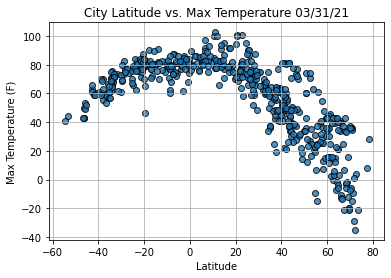

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

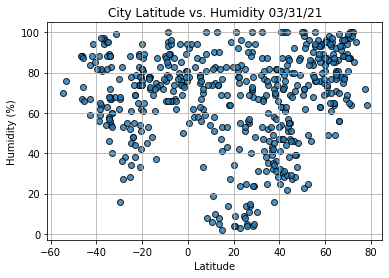

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

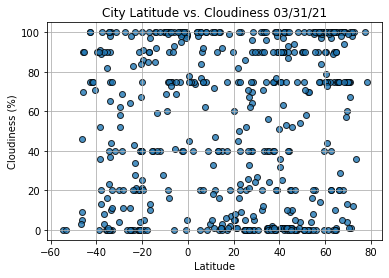

In [17]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

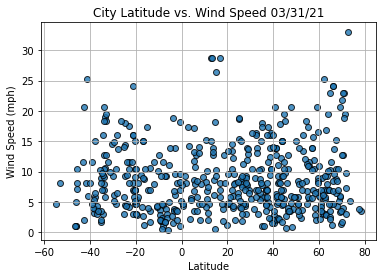

In [18]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()